## Problem Statement
This project understands how the students performance (test scores) is affected by other variables such as Gender,
Ethnicity, Parental level of education, Lunch and Test preparation course.

Note:  
We are going to see how the students are performing in test score and based on feature we will try to predict
test score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Information
. Gender: Sex of students --> male/female

. Race/Ethnicity: Ethnicity of students -->(Group A,B,C,D,E)

. Parental level of education: Parents final education -->(bachelor's degree, some college degree,associate's degree, high school)

. Lunch: having lunch before test (standard or free/reduced)

. Test preparation course: complete or not complete before test

. Math score

. Reading score

. Writing score

## Data checks to perform
. Check missing values

. Check duplicate

. Check data types

. Check the number of unique values in each column

. Check the statistics of the data set

. Check various categories present in the different categorical column

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df. describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights

. All means are close to each other between 66-68.5.

. SD is closed between 14.6-15-19.

. The minimum score for math is 0, for writing is 10, and for reading is 17.

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print('Categories in gender variable: ', end='')
print(df['gender'].unique())

print('Categories in race_ethnicity variable: ', end='')
print(df['race_ethnicity'].unique())

print('Categories in parental_level_of_education variable: ', end='')
print(df['parental_level_of_education'].unique())

print('Categories in lunch variable: ', end='')
print(df['lunch'].unique())

print('Categories in test_preparation_course variable: ', end='')
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


In [12]:
## Define number of categorical and numerical column

numerical_features = [features for features in df.columns if df[features].dtypes != 'O' ]
categorical_features = [features for features in df.columns if df[features].dtypes == 'O' ]

## Print Coolumns
print ('We have {} numerical features: {} ' .format(len(numerical_features), numerical_features))
print ('\nWe have {} categircal features: {} ' .format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score'] 

We have 5 categircal features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [13]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


Adding columns for Total Score and Average Score

In [14]:
df['total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Total Score and Average Score will be our Dependent feature and rest will be independent features

In [15]:
math_full =df[df['math_score']==100]['average'].count()
reading_full =df[df['reading_score']==100]['average'].count()
writing_full =df[df['writing_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [16]:
math_less_20 =df[df['math_score']<=20]['average'].count()
reading_less_20 =df[df['reading_score']<=20]['average'].count()
writing_less_20 =df[df['writing_score']<=20]['average'].count()

print(f'Number of students with full marks in Maths: {math_less_20}')
print(f'Number of students with full marks in Reading: {reading_less_20}')
print(f'Number of students with full marks in Writing: {writing_less_20}')

Number of students with full marks in Maths: 4
Number of students with full marks in Reading: 1
Number of students with full marks in Writing: 3


## Insights

. Students perform worst in maths

. Performed best in reading

## Exploration of Data (Visualization)

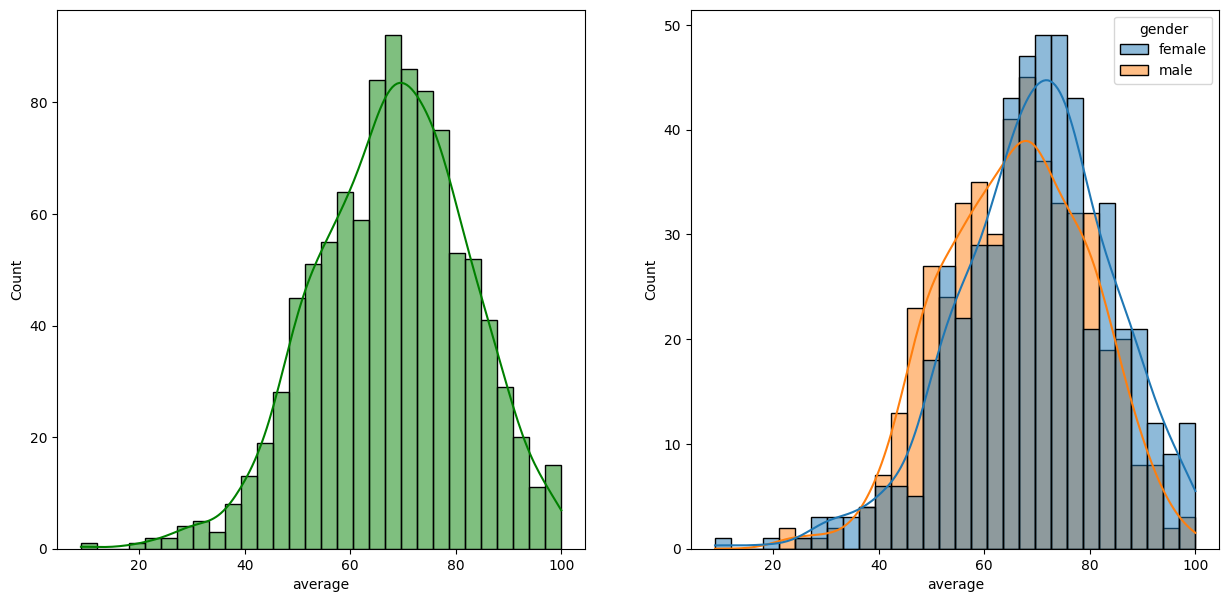

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30, kde=True,hue='gender')
plt.show()


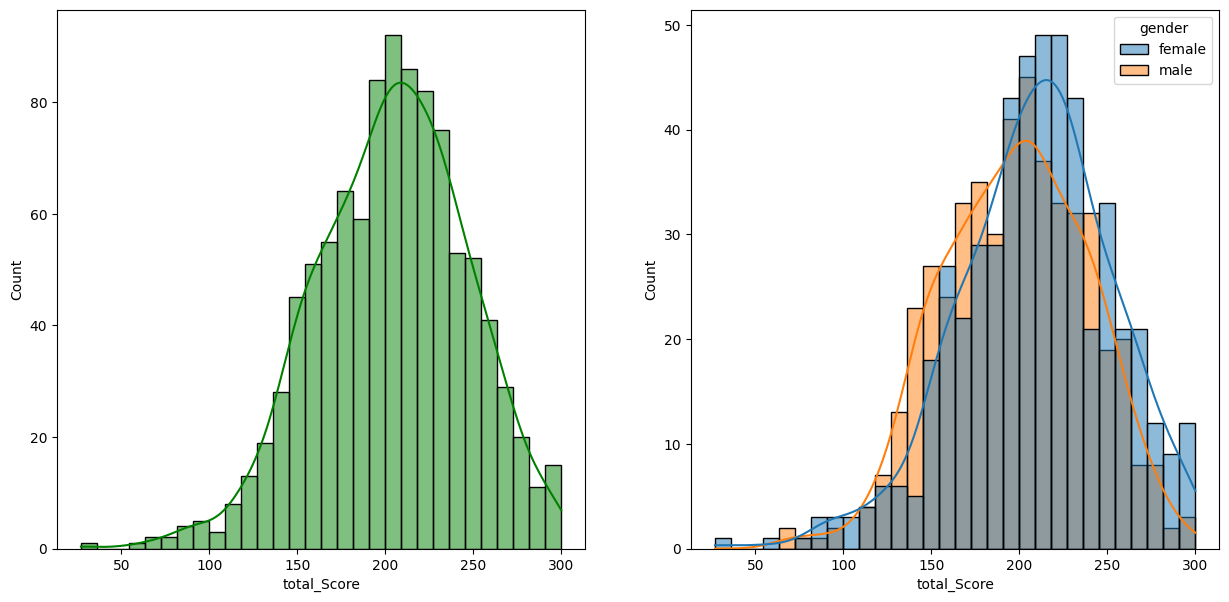

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_Score',bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_Score',bins=30, kde=True,hue='gender')
plt.show()

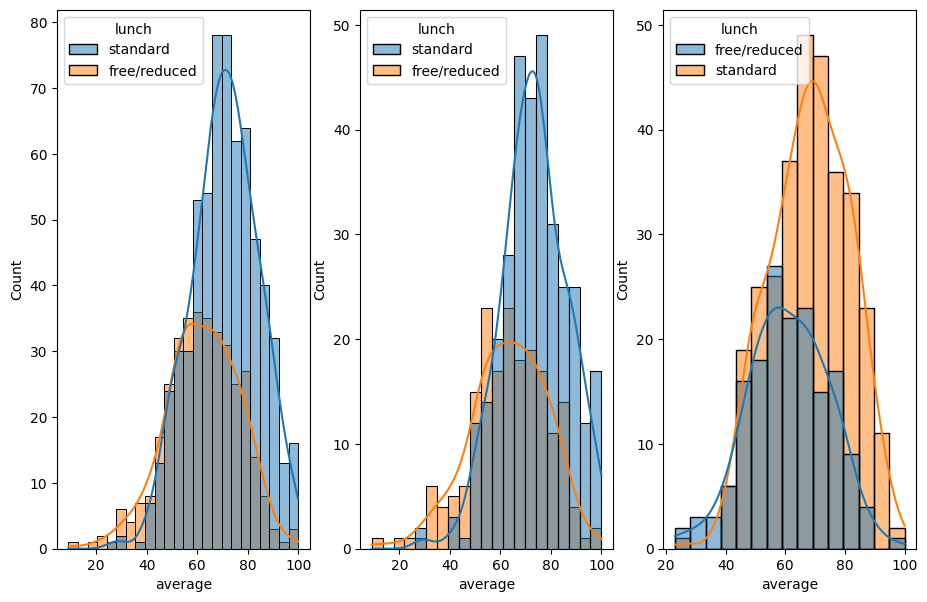

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average', kde=True,hue='lunch')
plt.show()

Standard lunch helped stud to perform well both male and female

In [20]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


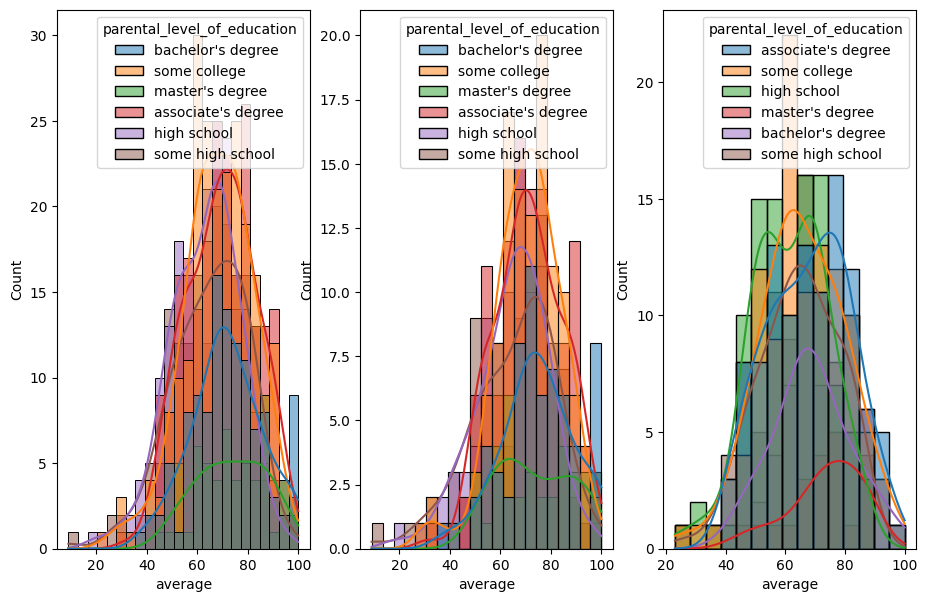

In [21]:
plt.subplots(1, 2, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average', kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Parental education does not helped in performance of stud

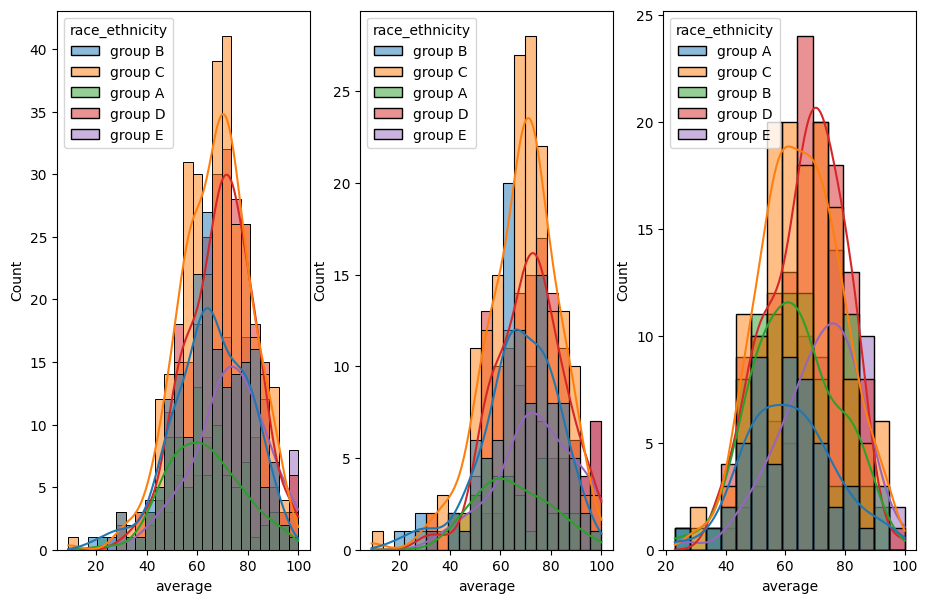

In [22]:
plt.subplots(1, 2, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average', kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Students of group A and B perform poorely in exams whether the are male or female

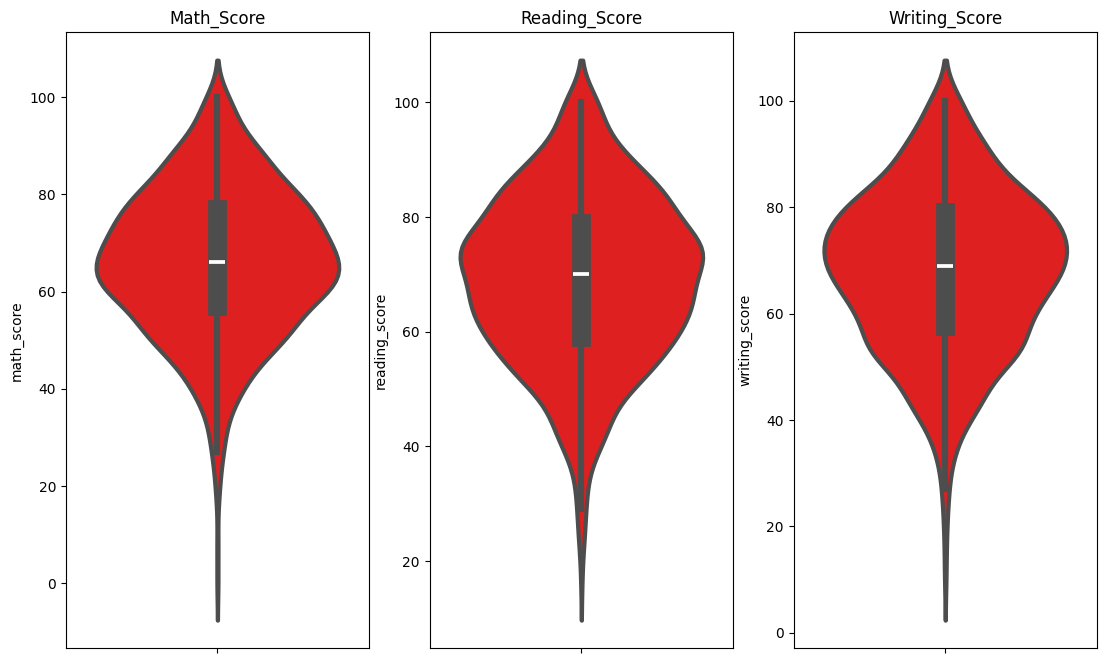

In [23]:
# Maximum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math_Score')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading_Score')
sns.violinplot(y='reading_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing_Score')
sns.violinplot(y='writing_score', data=df, color='red', linewidth=3)
plt.show()

Students score between 60-80 for maths and for reading and writing scored between 50-80

<function matplotlib.pyplot.show(close=None, block=None)>

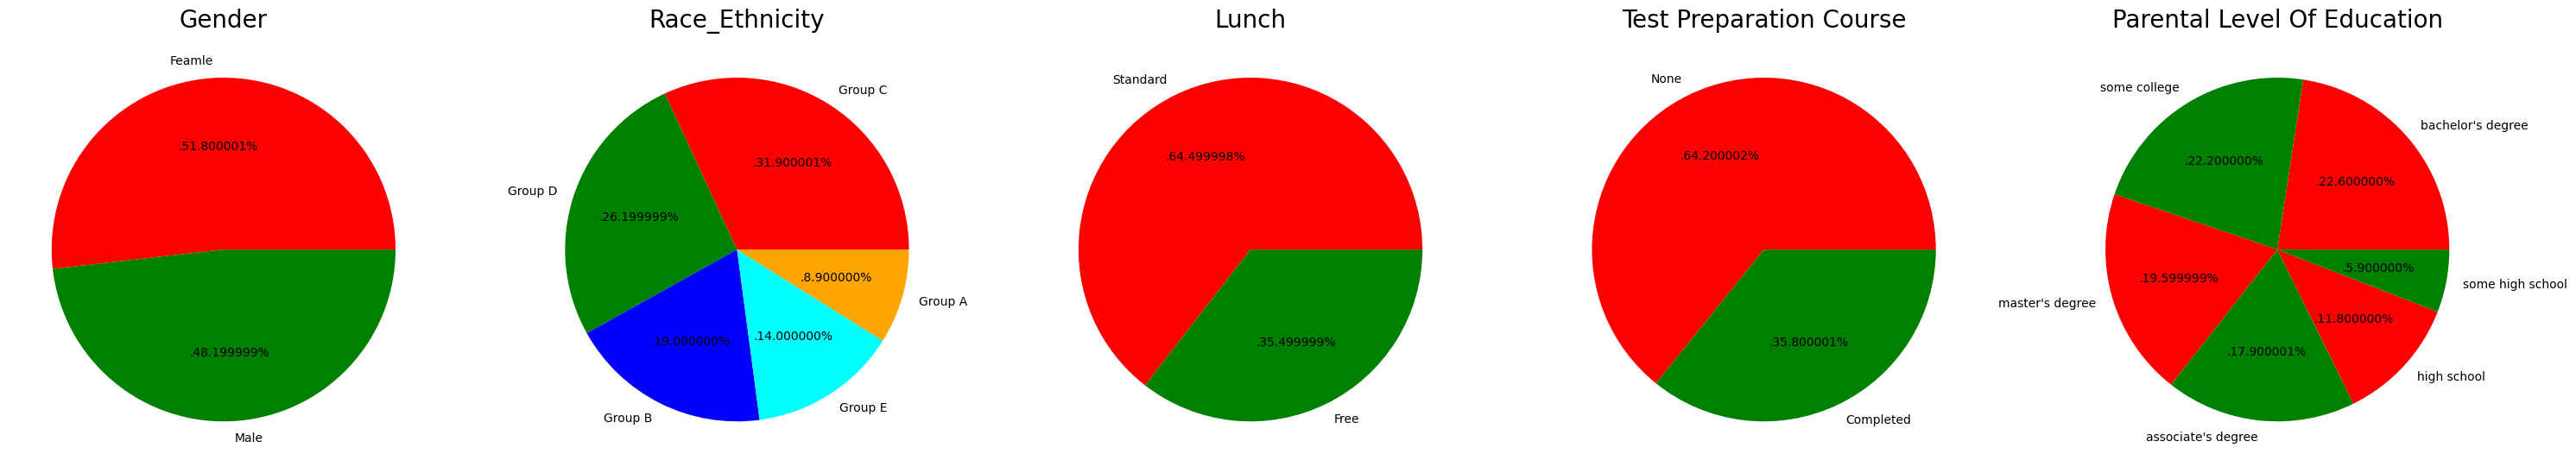

In [24]:
#Multivariate analysis using plot

plt.rcParams['figure.figsize'] = [30,12]

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Feamle', 'Male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize =20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Race_Ethnicity',fontsize =20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize =20)
plt.axis('off')




plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Test Preparation Course',fontsize =20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college' ,"master's degree" ,"associate's degree",'high school' ,'some high school'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Parental Level Of Education',fontsize =20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show

In Gender male and female students are almost equal.

In Race_Ethnicity Group C is greatest.

In Lunch there are more no of stud have standard lunch.

In Test Prep Course there are greater num of stud does not choosen any course prep.

In Parental level of education greater num of education is bachlor's degree closely followed by some college.

## Feature Wise Visulaization

## Gender Column

* How is distribution of Gender ?

* Is gender has any impact on student's performance ?

Univariate Analysis (How is distribution of gender?)

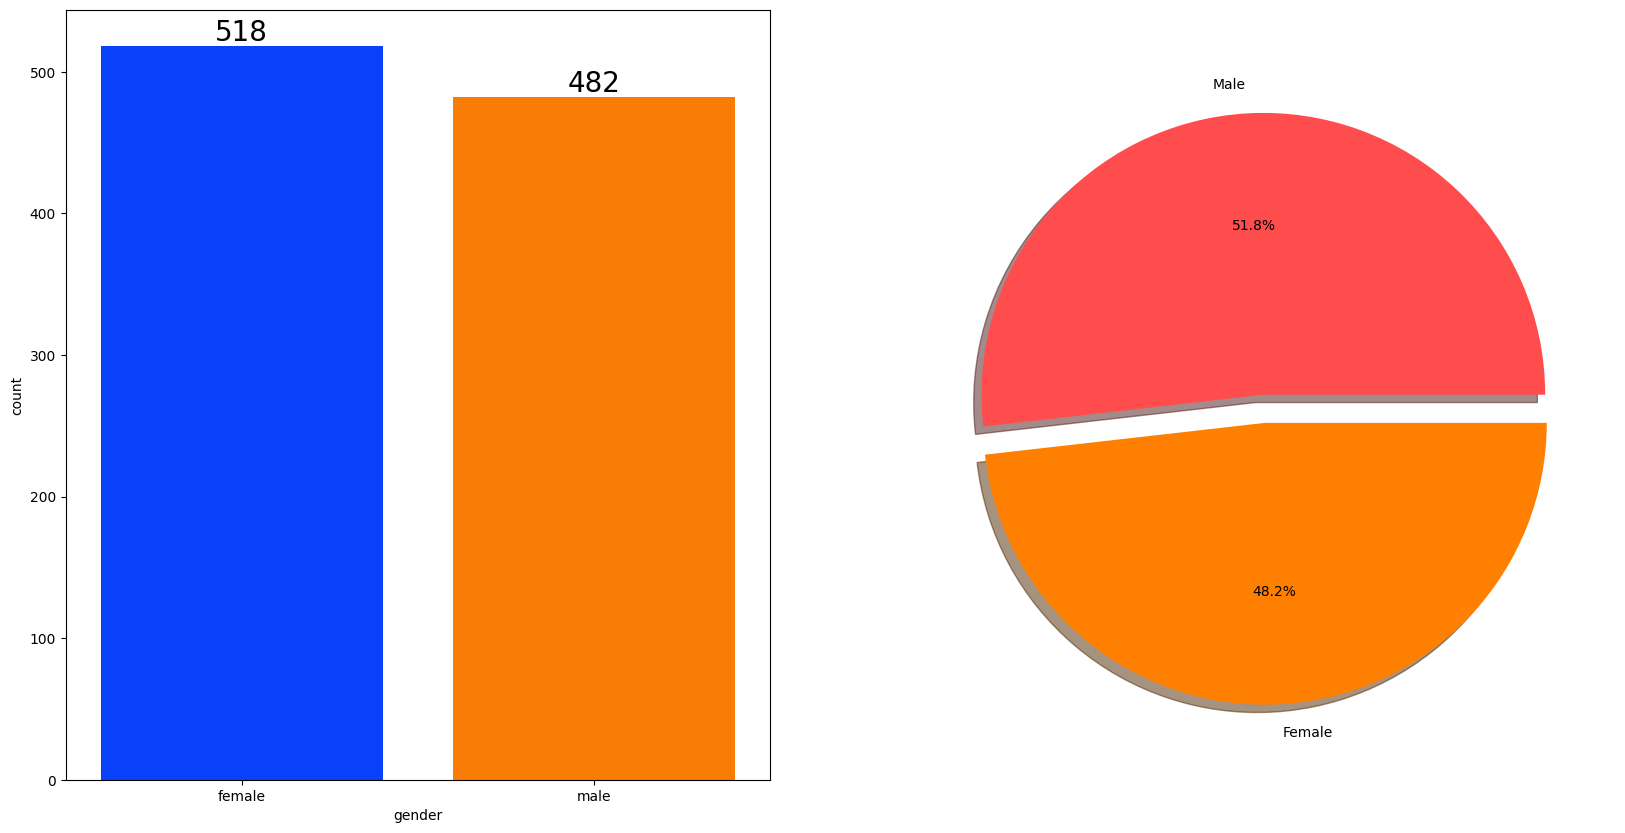

In [25]:
f, ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students 518 (48.2%) and male students 482 (51.8%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
df_1 = ['gender', 'math_score', 'reading_score', 'writing_score','average']
df_2 = df[df_1]
df_2

,gender,math_score,reading_score,writing_score,average
0,female,72,72,74,72.666667
1,female,69,90,88,82.333333
2,female,90,95,93,92.666667
3,male,47,57,44,49.333333
4,male,76,78,75,76.333333
...,...,...,...,...,...
995,female,88,99,95,94.000000
996,male,62,55,55,57.333333
997,female,59,71,65,65.000000
998,female,68,78,77,74.333333


In [28]:
gender_group = df_2.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


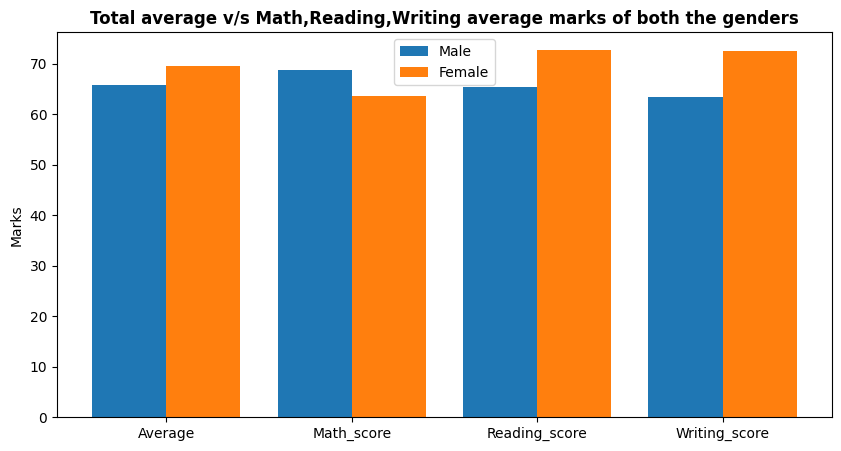

In [29]:
plt.figure(figsize= (10,5))
X = ['Average', 'Math_score','Reading_score', 'Writing_score']

female_score = [gender_group['average'][0],gender_group['math_score'][0],gender_group['reading_score'][0],gender_group['writing_score'][0]]
male_score = [gender_group['average'][1],gender_group['math_score'][1],gender_group['reading_score'][1],gender_group['writing_score'][1]]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4 , label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4 , label = 'Female')


plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title("Total average v/s Math,Reading,Writing average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()



Insights

* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

## RACE/EHNICITY COLUMN

* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

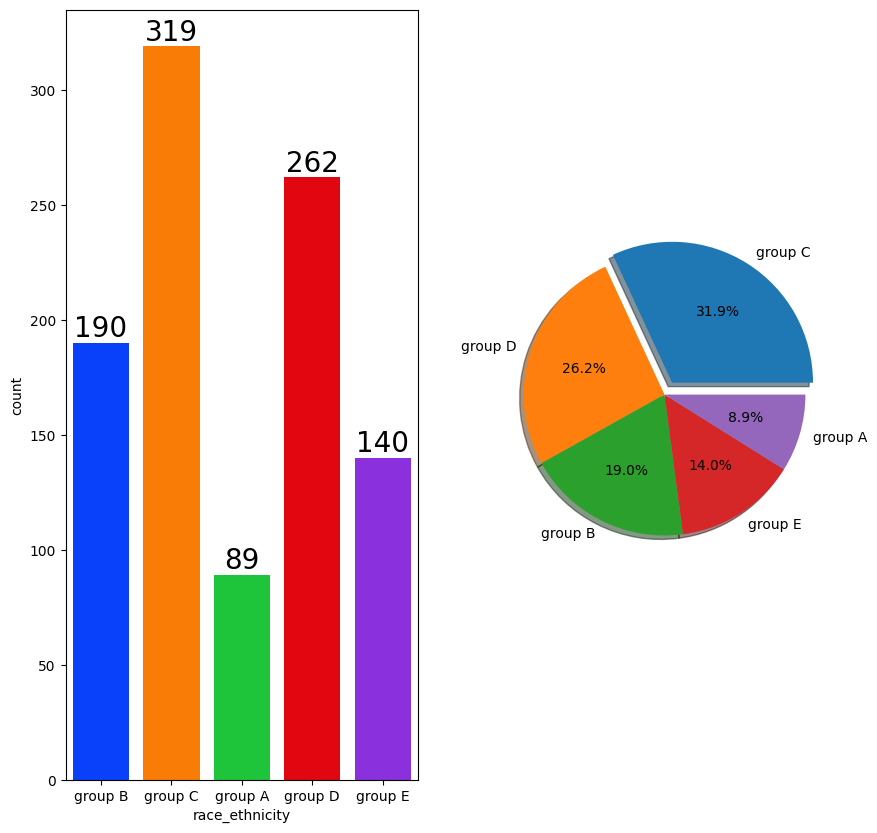

In [30]:
f, ax= plt.subplots(1,2,figsize=(10,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size = 20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights
* Most of the student belonging from group C and group D.
* Lowest number of students belong to group A.

BIVARIATE ANALYSIS ( Is Race_Ehnicity has any impact on student's performance ? )

In [31]:
df_3 = ['race_ethnicity', 'math_score', 'reading_score', 'writing_score']
df_4 = df[df_3]
df_4

,race_ethnicity,math_score,reading_score,writing_score
0,group B,72,72,74
1,group C,69,90,88
2,group B,90,95,93
3,group A,47,57,44
4,group C,76,78,75
...,...,...,...,...
995,group E,88,99,95
996,group C,62,55,55
997,group C,59,71,65
998,group D,68,78,77


In [32]:
group_data2 = df_4.groupby('race_ethnicity')
group_data2

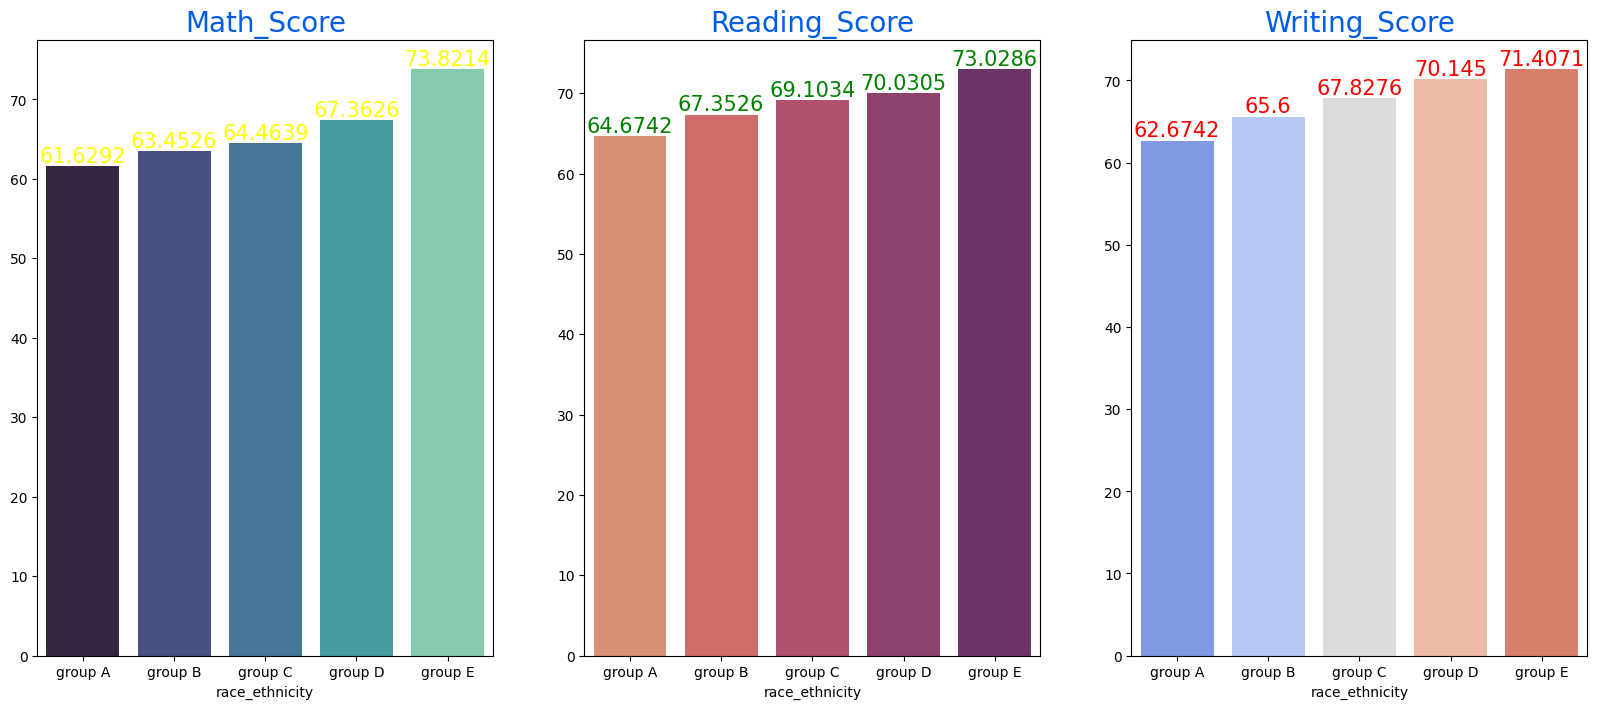

In [33]:
f,ax = plt.subplots(1,3,figsize = (20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math_Score', color = '#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='yellow', size = 15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading_Score', color = '#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='green', size = 15)


sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing_Score', color = '#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='red', size = 15)

Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

## PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

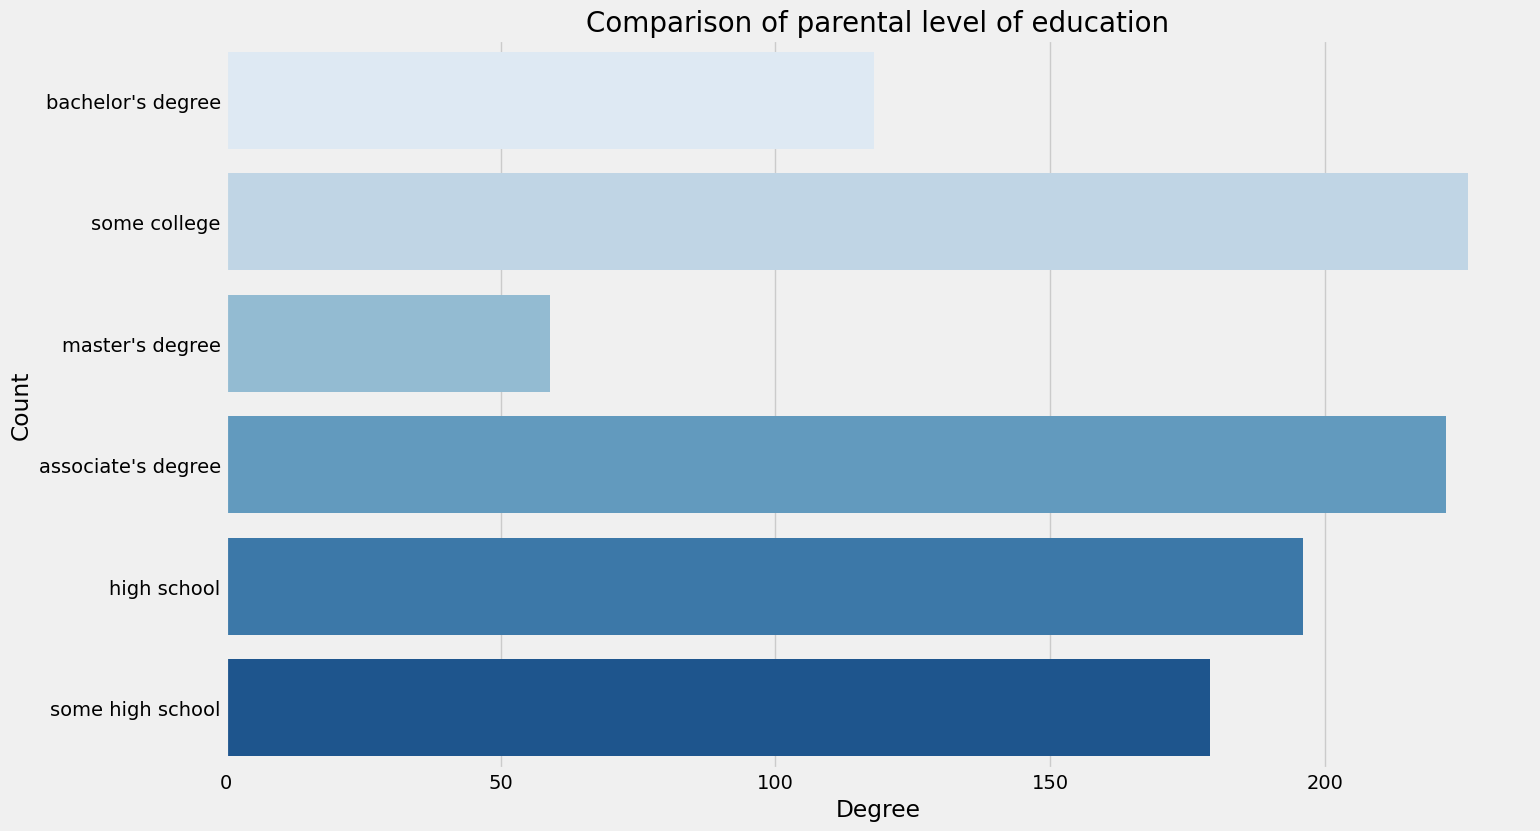

In [34]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parental level of education',fontweight =30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel ('Count')
plt.show()

Insights
* Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [35]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
df_5 = ['parental_level_of_education', 'average']
df_6 = df[df_5]
df_6

,parental_level_of_education,average
0,bachelor's degree,72.666667
1,some college,82.333333
2,master's degree,92.666667
3,associate's degree,49.333333
4,some college,76.333333
...,...,...
995,master's degree,94.000000
996,high school,57.333333
997,high school,65.000000
998,some college,74.333333


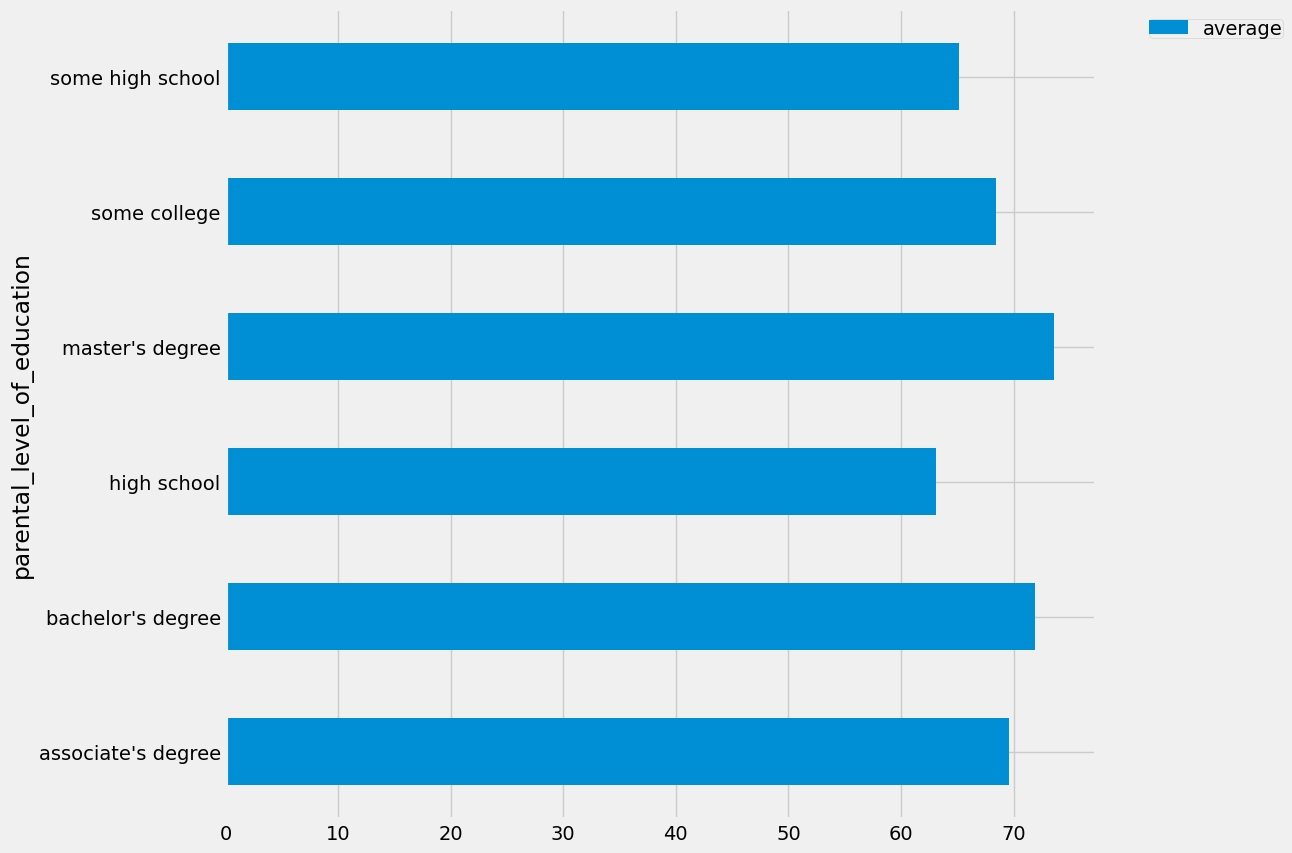

In [37]:
df_6.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderpad = 0)
plt.show()

Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

## LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

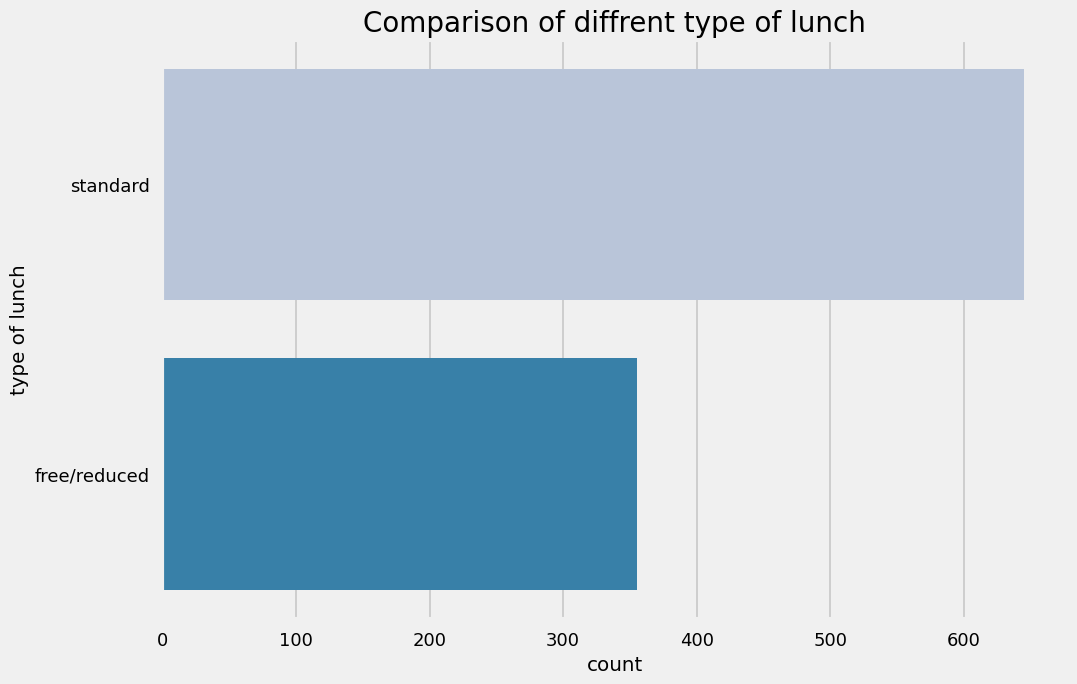

In [38]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title ('Comparison of diffrent type of lunch', fontweight =30 ,fontsize = 20)
plt.xlabel ('count')
plt.ylabel ('type of lunch')
plt.show()

Insights
* Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

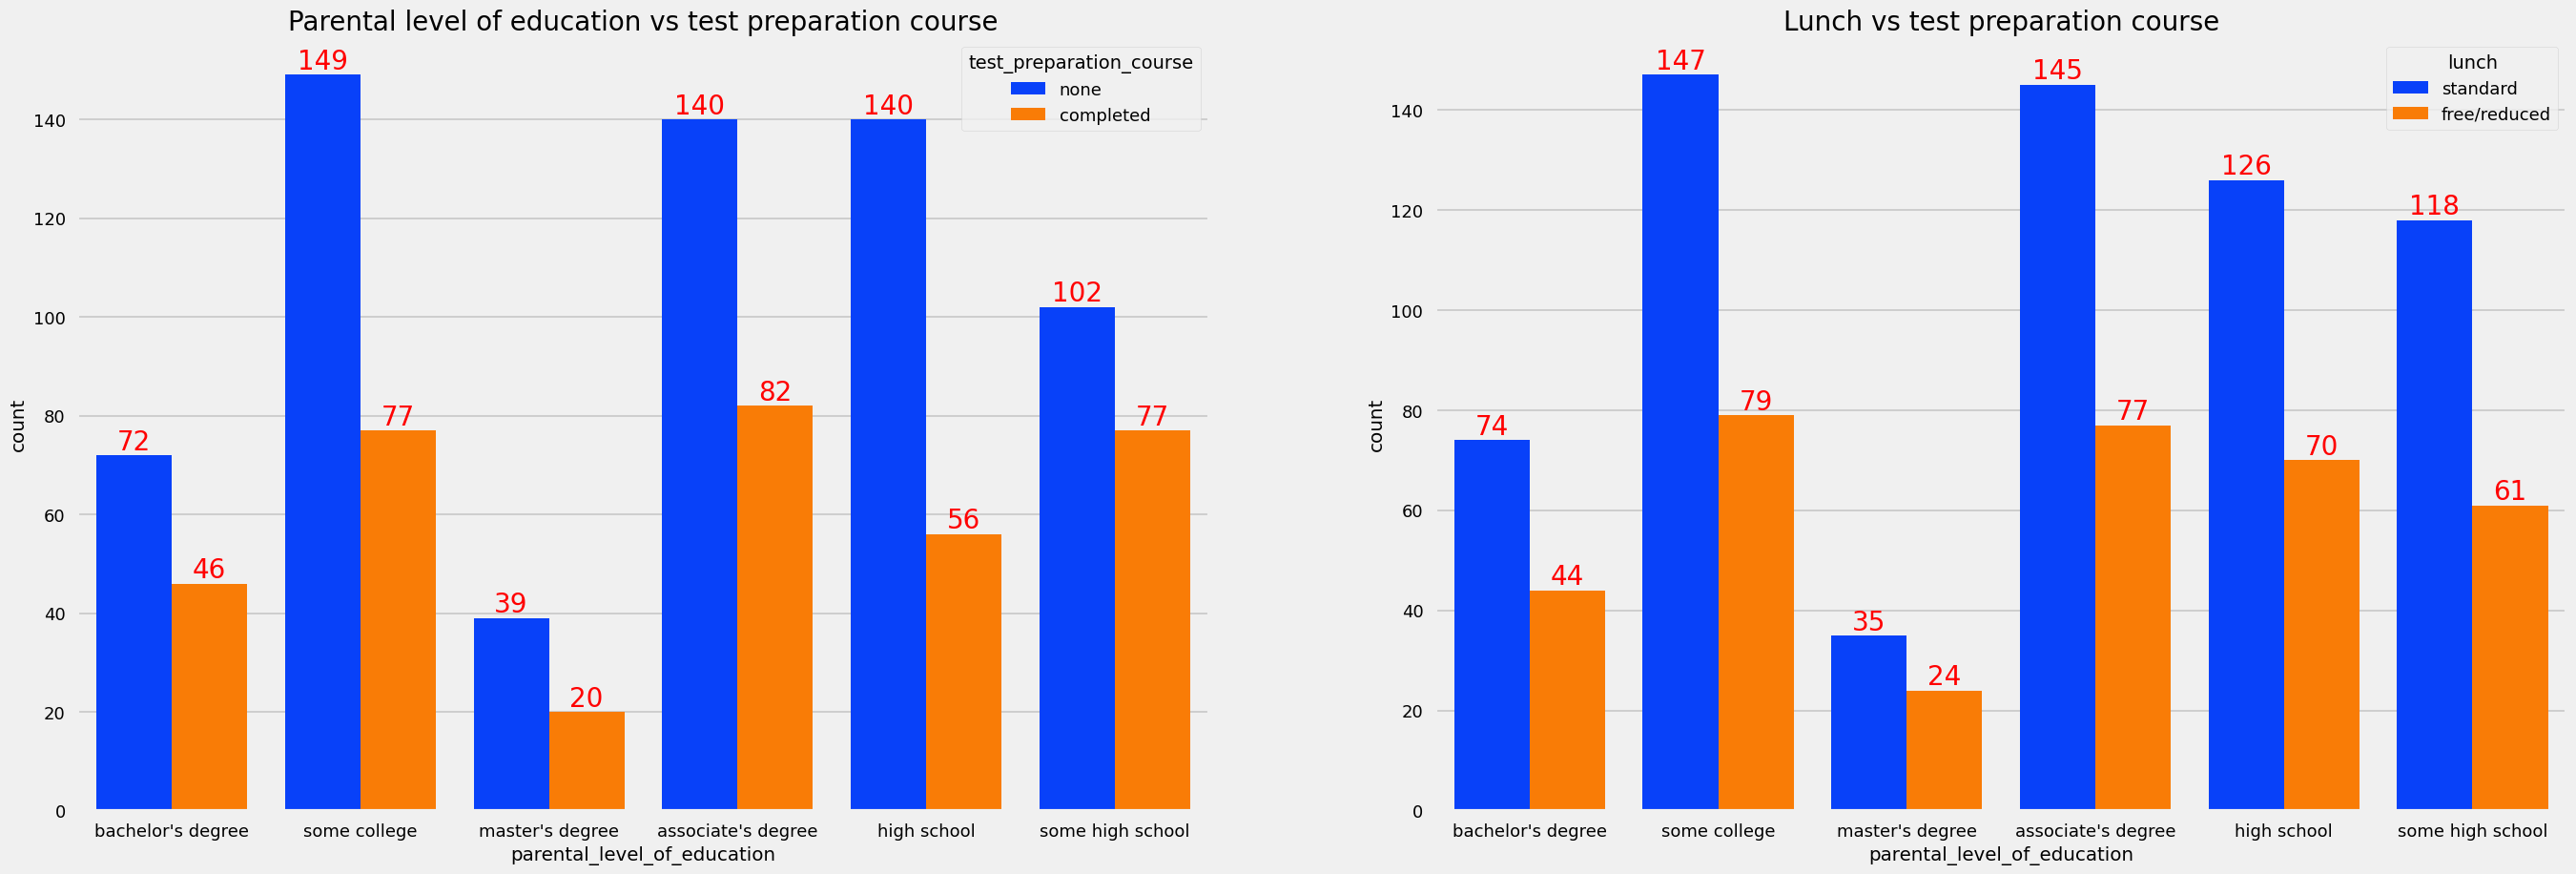

In [42]:
f,ax =plt.subplots(1,2,figsize=(30,10))
sns.countplot(x=df['parental_level_of_education'],data=df, palette='bright',hue = 'test_preparation_course', saturation= 0.95, ax=ax[0])
ax[0].set_title('Parental level of education vs test preparation course',color='black', size= 20)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'red', size =20)



sns.countplot(x=df['parental_level_of_education'],data=df, palette='bright',hue = 'lunch', saturation= 0.95, ax=ax[1])
ax[1].set_title('Lunch vs test preparation course',color='black', size= 20)
for container in ax[1].containers:
    ax[1].bar_label(container,color = 'red', size =20)




Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## TEST PREPARATION COURSE COLUMN
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='lunch', ylabel='writing_score'>

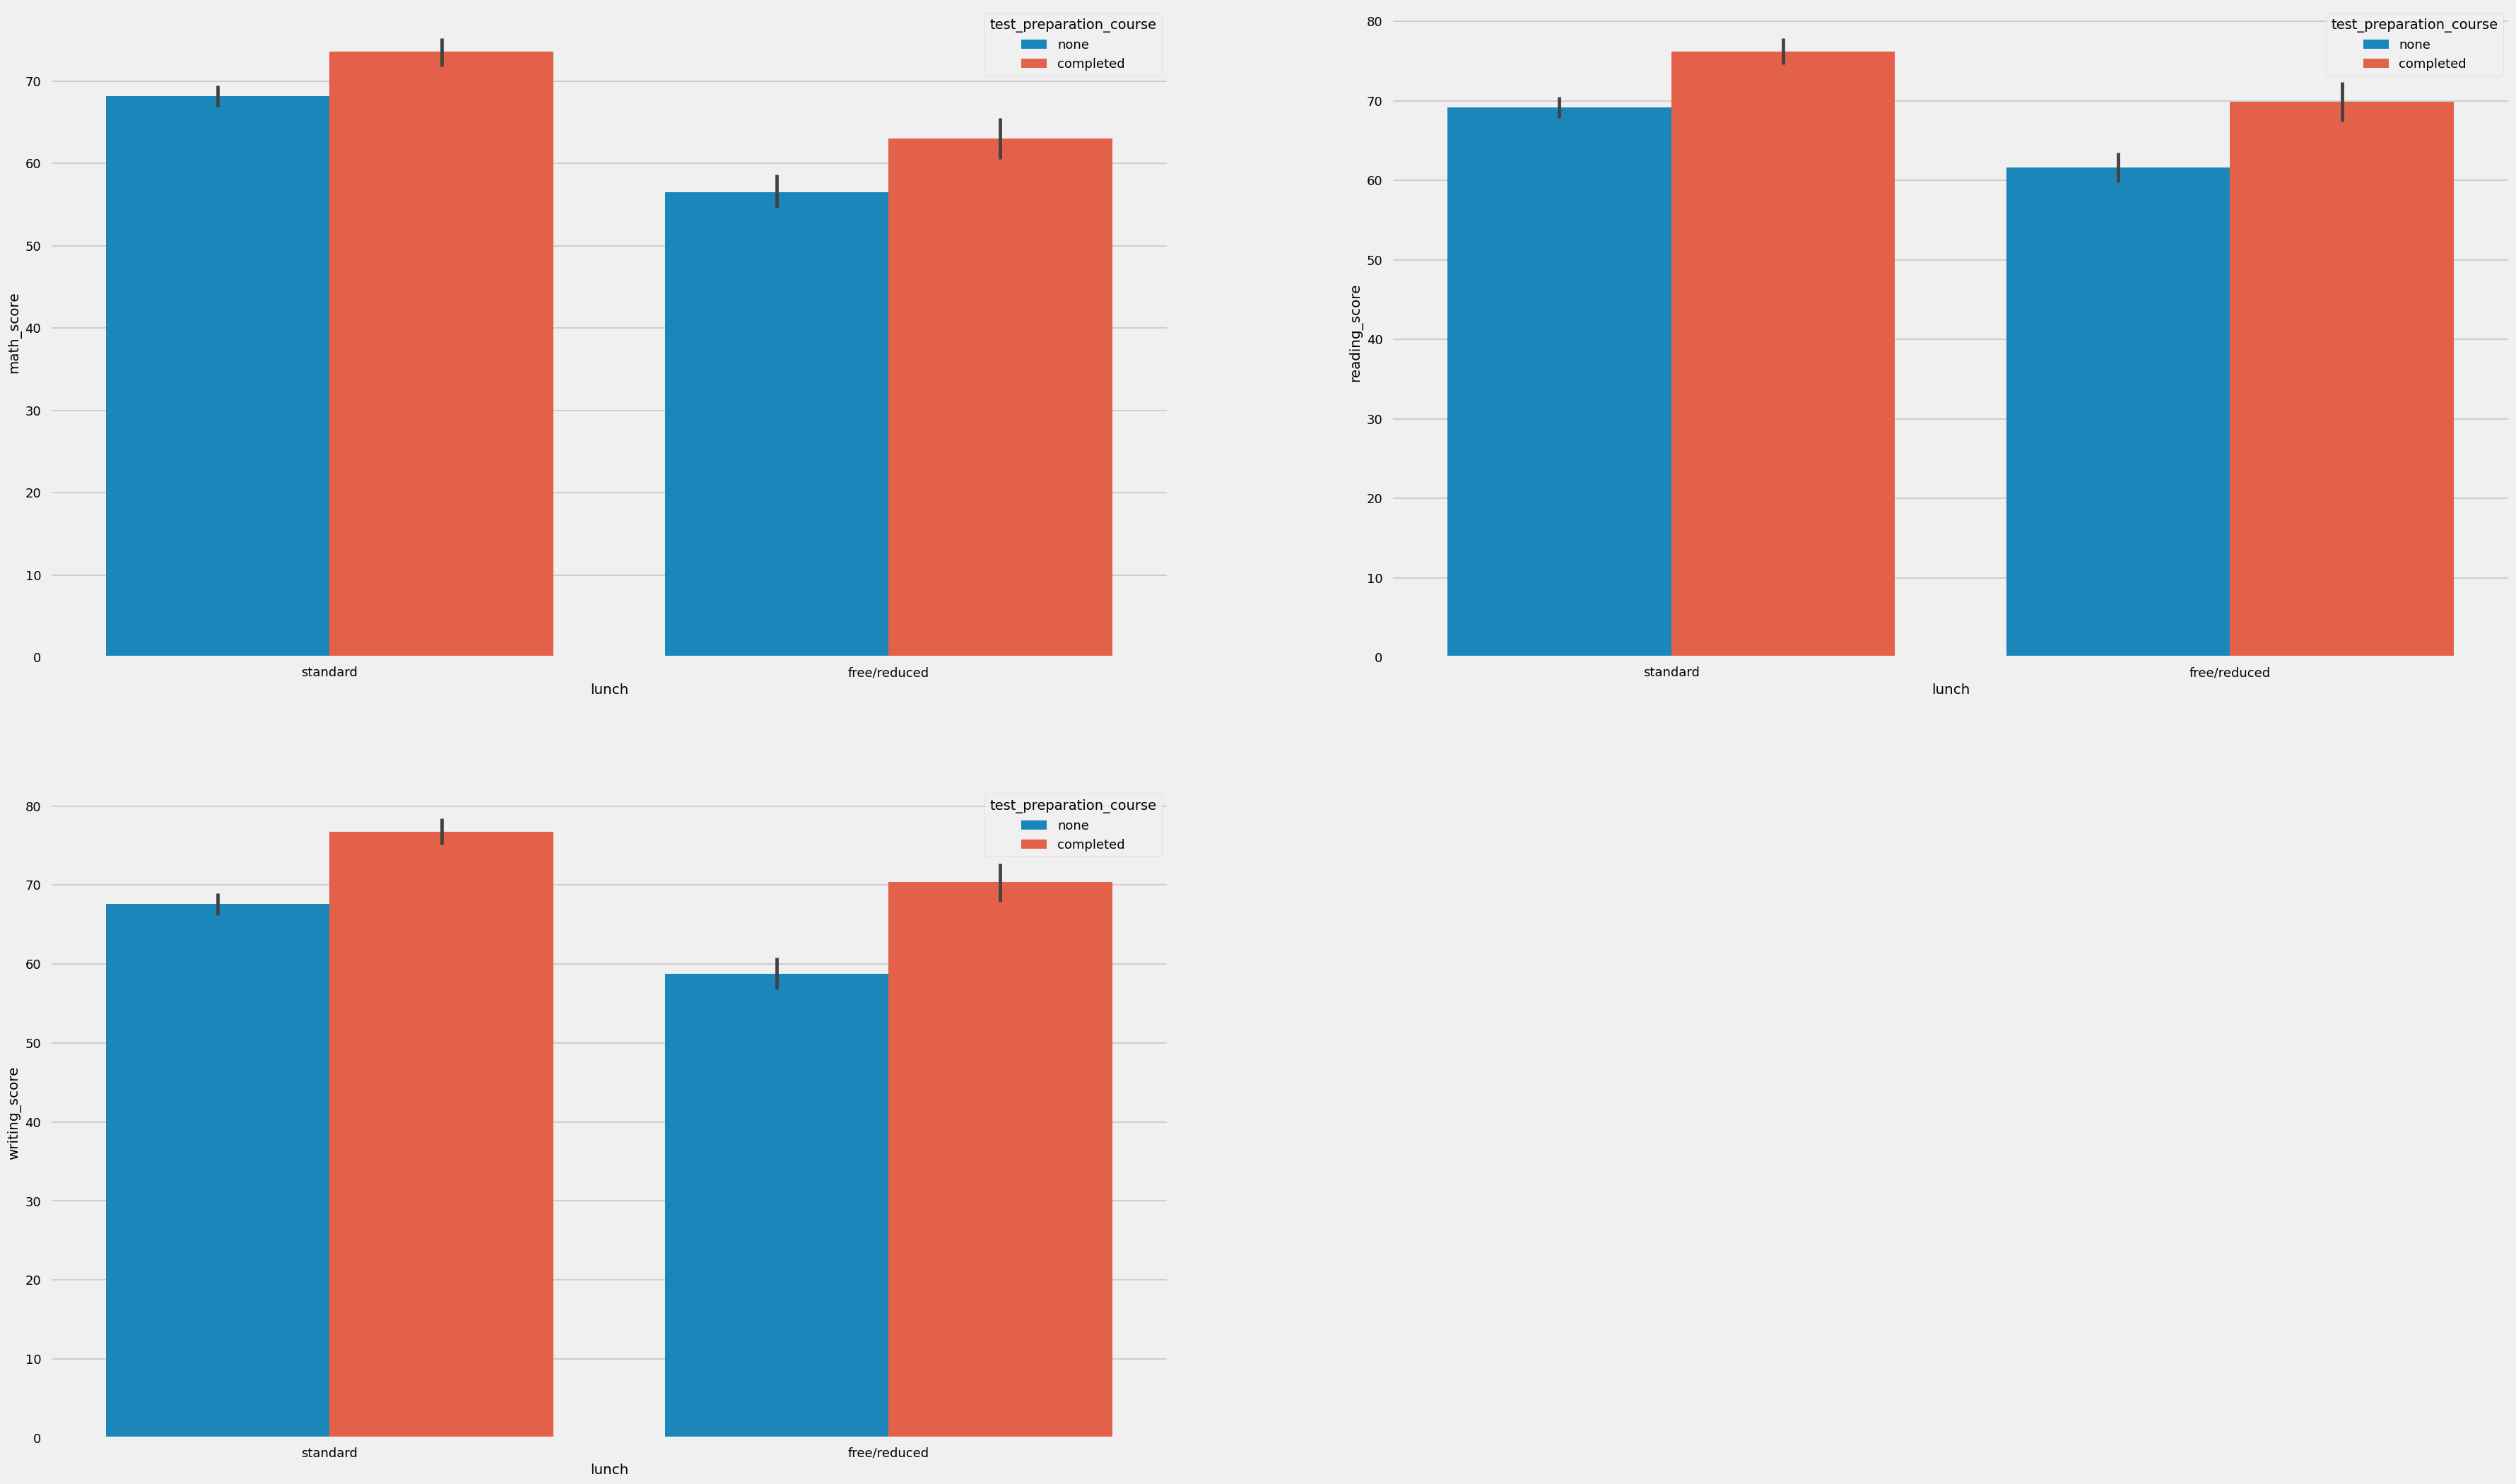

In [51]:
plt.figure(figsize=(40,25))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])

Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## CHECKING OUTLIERS

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


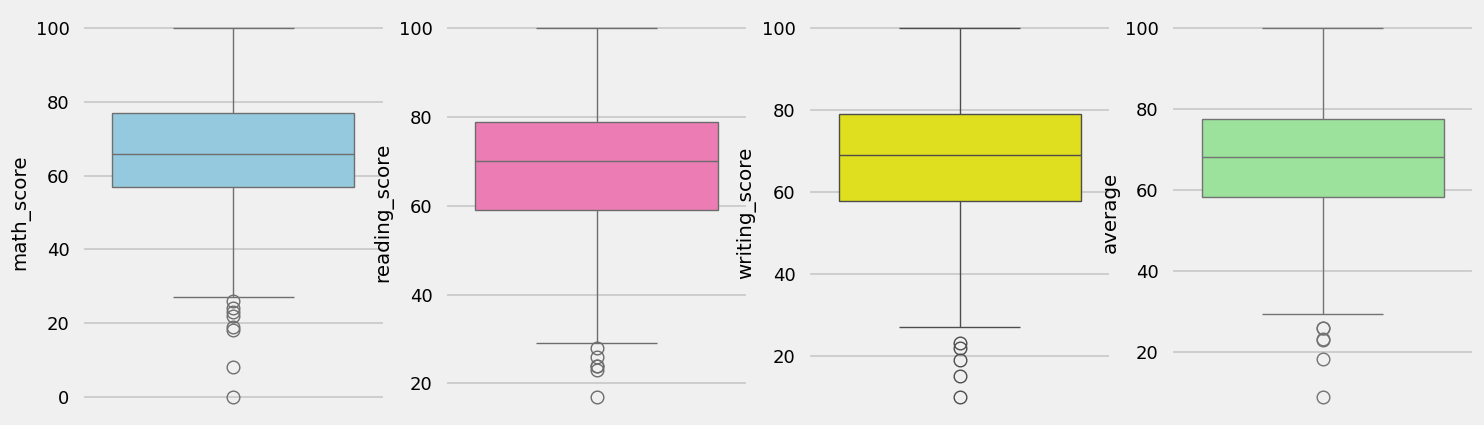

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()

## MUTIVARIATE ANALYSIS USING PAIRPLOT

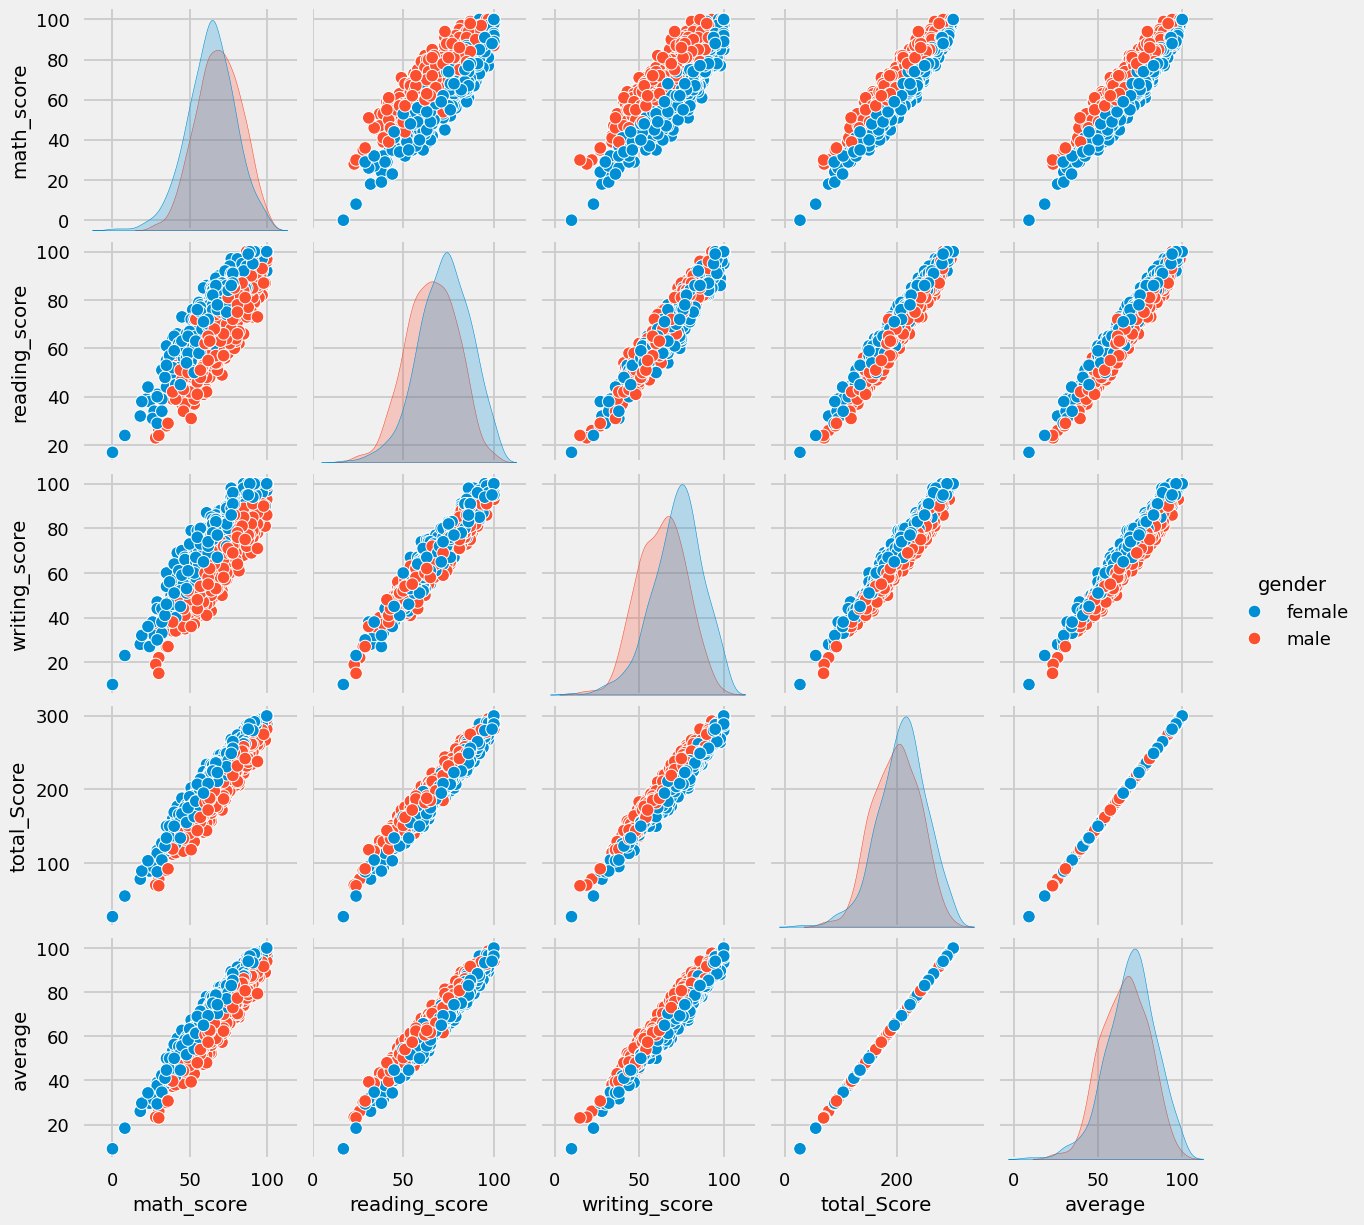

In [55]:
sns.pairplot(df,hue='gender')
plt.show()

Insights
* From the above plot it is clear that all the scores increase linearly with each other.

## Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.